In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('train (1).csv')

In [3]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [108]:
dd = data.copy()

In [109]:

dd.drop('player_id', axis=1, inplace=True)

In [110]:
dd.head(2)

,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0


In [111]:
dd.isna().sum()

name                            0
age                             0
gender                         19
country                         0
height                          0
weight                        417
ball_controlling_skills       413
body_reflexes                   0
body_balance                    0
jumping_skills                 24
penalties_conversion_rate      30
mental_strength                28
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                 572
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating              703
matches_played                666
fitness_rating                695
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience           144
no_of_disqualifications         0
selection                       0
dtype: int64

## Convrting height into cm and to int datatype

In [112]:
dd['height'].dtypes

dtype('O')

In [113]:
height_in_cm = pd.Series(dd['height'])

In [114]:
feet, inches = height_in_cm.str.split("'", expand = True).astype(float).values.T

In [115]:
cm = feet * 30.48 + inches * 2.54
cm = cm.round(1)
print(cm)

[188.  177.8 188.  ... 182.9 177.8 172.7]


In [116]:
dd['height_in_cm'] = cm

In [117]:
dd.head()

,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,...,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection,height_in_cm
0,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,...,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1,188.0
1,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,...,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0,177.8
2,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,...,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1,188.0
3,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,...,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1,180.3
4,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,...,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0,172.7


## Converting weight from lbs to kg and converting the datatype to int

In [118]:
dd["weight_lbs"] = dd["weight"].str.replace("lbs", "")

In [119]:
dd.head()

,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,...,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection,height_in_cm,weight_lbs
0,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,...,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1,188.0,176
1,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,...,0.0,NaN,3.0,Medium,Source,3.0,0.0,0,177.8,148
2,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,...,0.0,6.6,5.0,Low,Academy,2.0,0.0,1,188.0,172
3,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,...,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1,180.3,165
4,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,...,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0,172.7,158


In [120]:
dd["weight_lbs"] = dd["weight_lbs"].fillna(0)
dd["weight_lbs"] = dd["weight_lbs"].astype(int)


In [121]:
dd["weight_lbs"].dtypes

dtype('int32')

In [122]:
dd["weight_kg"] = dd["weight_lbs"]/ 2.2046

In [123]:
dd.head(10)

,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,...,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection,height_in_cm,weight_lbs,weight_kg
0,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,...,8.1,2.0,High,Talent Hunt,8.0,0.0,1,188.0,176,79.833076
1,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,...,NaN,3.0,Medium,Source,3.0,0.0,0,177.8,148,67.132360
2,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,...,6.6,5.0,Low,Academy,2.0,0.0,1,188.0,172,78.018688
3,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,...,8.6,6.0,Medium,Academy,13.0,16.0,1,180.3,165,74.843509
4,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,...,5.7,5.0,Medium,Academy,4.0,0.0,0,172.7,158,71.668330
5,Tandra Tijerina,21,M,Guinea,6'0,174lbs,63.0,69.0,65.0,65.0,...,6.9,3.0,Medium,Academy,7.0,0.0,0,182.9,174,78.925882
6,Narcisa Garnes,24,F,China PR,5'10,148lbs,64.0,68.0,71.0,53.0,...,7.3,2.0,High,Academy,10.0,0.0,0,177.8,148,67.132360
7,Joyce Boxx,21,F,United States,5'11,168lbs,58.0,60.0,57.0,74.0,...,6.8,5.0,Medium,Talent Hunt,6.0,0.0,1,180.3,168,76.204300
8,Josette Mcgrew,25,M,Italy,6'0,176lbs,67.0,70.0,58.0,65.0,...,8.2,2.0,Medium,Academy,11.0,0.0,1,182.9,176,79.833076
9,Hai Brandel,16,M,Belgium,6'2,183lbs,49.0,56.0,61.0,62.0,...,6.1,2.0,Medium,Unknown,2.0,0.0,1,188.0,183,83.008255


In [124]:
# dropping unwanted columns
dd = dd.drop(['height','weight', 'weight_lbs','name', 'country','matches_played'], axis=1)

In [125]:
dd.head(5)

,age,gender,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,...,behaviour_rating,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection,height_in_cm,weight_kg
0,23,M,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,...,7.7,8.1,2.0,High,Talent Hunt,8.0,0.0,1,188.0,79.833076
1,18,M,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,...,5.3,NaN,3.0,Medium,Source,3.0,0.0,0,177.8,67.132360
2,16,F,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,...,4.7,6.6,5.0,Low,Academy,2.0,0.0,1,188.0,78.018688
3,27,M,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,...,8.6,8.6,6.0,Medium,Academy,13.0,16.0,1,180.3,74.843509
4,19,F,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,...,NaN,5.7,5.0,Medium,Academy,4.0,0.0,0,172.7,71.668330


In [126]:
dd.loc[dd["weight_kg"] == 0, "weight_kg"] = dd["height_in_cm"] - 100

----

In [127]:
dd["gender"] = dd["gender"].fillna(dd["gender"].mode()[0])
dd["strong_foot"] = dd["strong_foot"].fillna(dd["strong_foot"].mode()[0])
dd["shot_accuracy"] = dd["shot_accuracy"].fillna(dd["shot_accuracy"].mode()[0])
dd["behaviour_rating"] = dd["behaviour_rating"].fillna(dd["behaviour_rating"].mode()[0])
dd["ball_controlling_skills"] = dd["ball_controlling_skills"].fillna(dd["ball_controlling_skills"].mode()[0])
dd["jumping_skills"] = dd["jumping_skills"].fillna(dd["jumping_skills"].mode()[0])
dd["penalties_conversion_rate"] = dd["penalties_conversion_rate"].fillna(dd["penalties_conversion_rate"].mode()[0])
dd["mental_strength"] = dd["mental_strength"].fillna(dd["mental_strength"].mode()[0])
dd["fitness_rating"] = dd["fitness_rating"].fillna(dd["fitness_rating"].median())
dd["coaching"] = dd["coaching"].fillna(dd["coaching"].mode()[0])
dd["years_of_experience"] = dd["years_of_experience"].fillna(dd["years_of_experience"].mode()[0])



In [128]:
dd.isna().sum()

age                          0
gender                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
height_in_cm                 0
weight_kg                    0
dtype: int64

In [145]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  int32  
 2   ball_controlling_skills    13994 non-null  float64
 3   body_reflexes              13994 non-null  float64
 4   body_balance               13994 non-null  float64
 5   jumping_skills             13994 non-null  float64
 6   penalties_conversion_rate  13994 non-null  float64
 7   mental_strength            13994 non-null  float64
 8   goalkeeping_skills         13994 non-null  float64
 9   defending_skills           13994 non-null  float64
 10  passing_skills             13994 non-null  float64
 11  dribbling_skills           13994 non-null  float64
 12  shot_accuracy              13994 non-null  float64
 13  body_strength_stamina      13994 non-null  flo

In [130]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [131]:
dd['strong_foot'] = label_encoder.fit_transform(dd['strong_foot'])
dd['gender'] = label_encoder.fit_transform(dd['gender'])

In [133]:
dd_encoded = pd.get_dummies(dd[['dedication_level','coaching']],drop_first=True)
dd_encoded = dd_encoded.replace({False:0, True:1})

In [134]:
dd_encoded.head()

,dedication_level_Low,dedication_level_Medium,coaching_Source,coaching_Talent Hunt,coaching_Unknown
0,0,0,0,1,0
1,0,1,1,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [136]:
dd = dd.drop(['dedication_level', 'coaching'], axis = 1)

In [137]:
dd = pd.concat((dd, dd_encoded), axis =1)

In [138]:
dd.head()

,age,gender,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,...,years_of_experience,no_of_disqualifications,selection,height_in_cm,weight_kg,dedication_level_Low,dedication_level_Medium,coaching_Source,coaching_Talent Hunt,coaching_Unknown
0,23,1,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,...,8.0,0.0,1,188.0,79.833076,0,0,0,1,0
1,18,1,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,...,3.0,0.0,0,177.8,67.132360,0,1,1,0,0
2,16,0,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,...,2.0,0.0,1,188.0,78.018688,1,0,0,0,0
3,27,1,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,...,13.0,16.0,1,180.3,74.843509,0,1,0,0,0
4,19,0,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,...,4.0,0.0,0,172.7,71.668330,0,1,0,0,0


## Performing train test split

In [140]:
inde = dd.drop('selection', axis =1)
dep = dd['selection']


In [144]:
from sklearn.model_selection import train_test_split
inde_train, inde_test, dep_train, dep_test = train_test_split(inde, dep, test_size=0.25, random_state=46)

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Crossvalidation

In [152]:
param_dist = {"n_estimators": [100, 200, 300, 400, 500],
              "max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

rf_cv = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5)

In [155]:
rf_cv.fit(inde_train, dep_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000246E306BD90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000246E306A850>,
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

Finding the right values and hightest score 

In [157]:
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 500}
Best score is 0.8549785612196283


# Performing DecisionTree Classifier

In [160]:
tree = RandomForestClassifier(max_depth=None, max_features=5, min_samples_leaf=5, criterion='entropy', n_estimators=500)

In [163]:
tree.fit(inde_train, dep_train)

RandomForestClassifier(criterion='entropy', max_features=5, min_samples_leaf=5,
                       n_estimators=500)

In [164]:
prediciton = tree.predict(inde_test)

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
print('Accuracy is ', accuracy_score(dep_test, prediciton))

Accuracy is  0.8631037439268362


<Axes: >

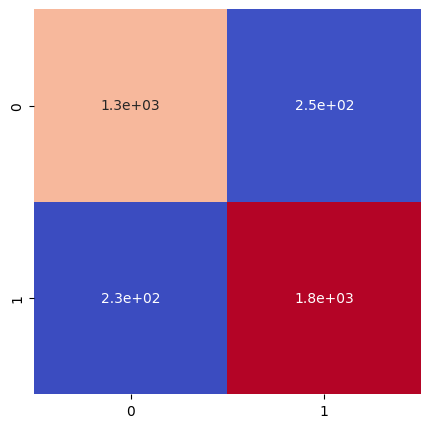

In [178]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(dep_test, prediciton), annot = True, cmap = 'coolwarm', cbar = False)

In [177]:
r2Score = r2_score(dep_test, prediciton)
print(r2Score)

0.4413240986297279


---

In [179]:
print('Accuracy is ', accuracy_score(dep_test, prediciton))
print(r2Score)

Accuracy is  0.8631037439268362
0.4413240986297279
